# Laboratorio 4: Aprendizaje Supervisado

> **Análisis de las Posiciones del Aborto en Twitter**
> *Diplomatura en Ciencias de Datos, Aprendizaje Automático y sus aplicaciones.*
> *Integrantes: 
    - Carlos Piaggio
    - Juan Pablo Analian
    
- [Notebook 1](entrega_04_v7.ipynb)
- [Notebook 3](entrega_04_v9.ipynb)
    
## Parte 2/3 (probando modelos del TP3)    

In [1]:
from collections import Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#from sklearn.metrics import mean_squared_error, accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from ml.visualization import plot_confusion_matrix, plot_learning_curve, classifier_boundary

 
from sklearn import tree
from sklearn import datasets
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

import sklearn.linear_model
from sklearn.linear_model import SGDClassifier,Perceptron
from sklearn.linear_model import LogisticRegression

from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)



## 1. Cargamos dataset que hemos limpiado en la notebook anterior


In [2]:
df_full = pd.read_csv('./out/df_text_junio.csv')

In [3]:
df_full.codigo_posicion.value_counts()

1    780325
0    260839
Name: codigo_posicion, dtype: int64

#### Metodos auxiliares

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report 

LABELS = ['a favor','en contra']

def mostrar_resultados(y_test, y_pred):    
    print ("Accuracy score:  %.2f" % accuracy_score(y_test, y_pred))
    print ("=============================")
    print (classification_report(y_test, y_pred, labels=[1,0], target_names=LABELS))

## 2. Bag of Words (Tfidf)

Trabajaremos el feature de texto con el metodo: Term Frequency-Inverse Document Frequency

- Definimos un maximo de features de 1500.
- Min = que por lo menos estén en 5 documentos o mas.
- max = hasta 70% de los doc.

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

MAX_FEATURES = 1500

tfidfconverter = TfidfVectorizer(max_features=MAX_FEATURES, min_df=5, max_df=0.7)
X = tfidfconverter.fit_transform(df_full['text'].values).toarray()

## 3. Train - Test Split

In [5]:
y = df_full['codigo_posicion'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train",X_train.shape)
print("X_test", X_test.shape)
print("y_train", y_train.shape)
print("y_test", y_test.shape)

X_train (832931, 1500)
X_test (208233, 1500)
y_train (832931,)
y_test (208233,)


## 4. Clasificador SDG


In [38]:
model_sdg =SGDClassifier (loss='log', penalty='l2', alpha=0.01, 
                          learning_rate='optimal', eta0 = 0.1, tol=1e-3,  
                          max_iter= 1000, random_state=42, n_jobs = 5)

model_sdg.fit(X_train, y_train)
y_pred = model_sdg.predict(X_test)

mostrar_resultados(y_test, y_pred)

Accuracy score:  0.75
              precision    recall  f1-score   support

     a favor       0.75      1.00      0.86    156147
   en contra       0.00      0.00      0.00     52086

    accuracy                           0.75    208233
   macro avg       0.37      0.50      0.43    208233
weighted avg       0.56      0.75      0.64    208233



/users/jpanalian/miniconda3/envs/deeplearning/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


> En el TP3, había obtenido un accuray del *82%* sobre el set de validacion (test) y aca hemos obtenido *75%*.

## 5. KNN (Nearest Neighbors)

Si bien estamos ante un problema de clasificacion binaria, queremos realizar una prueba con el algoritmo KNN el cual está mas orientado a clasificacion multiclase. 

In [ ]:
model_k = KNeighborsClassifier(n_neighbors=3, n_jobs = 5)
model_k.fit(X_train, y_train)
y_pred = model_k.predict(X_test)

mostrar_resultados(y_test, y_pred)


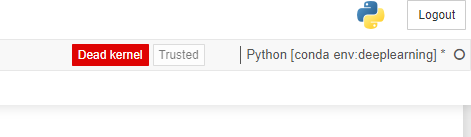

## 6. Regresion Logistica

In [6]:
model_l = LogisticRegression(random_state=42, solver='liblinear', multi_class='ovr' , n_jobs = 5)
model_l.fit(X_train, y_train)
y_pred = model_l.predict(X_test)

mostrar_resultados(y_test, y_pred)

/users/jpanalian/miniconda3/envs/deeplearning/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


Accuracy score:  0.90
              precision    recall  f1-score   support

     a favor       0.92      0.95      0.93    156147
   en contra       0.83      0.74      0.78     52086

    accuracy                           0.90    208233
   macro avg       0.88      0.85      0.86    208233
weighted avg       0.90      0.90      0.90    208233



## 7. Arboles de desicion

In [8]:
model_t = tree.DecisionTreeClassifier(max_depth=2, random_state=42 )
model_t.fit(X_train, y_train)
y_pred = model_t.predict(X_test)

mostrar_resultados(y_test,y_pred )

Accuracy score:  0.76
              precision    recall  f1-score   support

     a favor       0.77      0.98      0.86    156147
   en contra       0.66      0.10      0.18     52086

    accuracy                           0.76    208233
   macro avg       0.72      0.54      0.52    208233
weighted avg       0.74      0.76      0.69    208233



## 8 RandomForest

In [9]:
model_rf = RandomForestClassifier(n_estimators= 100, max_depth = 20, min_samples_split=10, random_state=42, n_jobs=5)    
model_rf.fit(X_train, y_train)    
y_pred = model_rf.predict(X_test)    

mostrar_resultados(y_test, y_pred)    
#inició:15:58  terminó: 16:03

Accuracy score:  0.80
              precision    recall  f1-score   support

     a favor       0.79      1.00      0.88    156147
   en contra       0.99      0.20      0.33     52086

    accuracy                           0.80    208233
   macro avg       0.89      0.60      0.61    208233
weighted avg       0.84      0.80      0.74    208233

